In [43]:

import pandas as pd
import seaborn as sns

%matplotlib inline
data1 =pd.read_csv('C:\Program Files (x86)\datalab\\nyt30.csv')







In [44]:

def setAgeGroup(age):
    if (age < 18):
        return "<18"
    elif (age < 25):
        return "18-24"
    elif (age < 35):
        return "25-34"
    elif (age < 45):
        return "35-44"
    elif (age < 55):
        return "45-54"
    elif (age < 65):
        return "55-64"
    elif (age >= 65):
        return "65+"

data1["AgeGroup"] = data1.Age.apply(lambda x: setAgeGroup(x))

print(data1.head(10))


   Age  Gender  Impressions  Clicks  Signed_In AgeGroup
0   56       1            6       1          1    55-64
1   47       0            5       0          1    45-54
2    0       0            6       0          0      <18
3    0       0            6       0          0      <18
4    0       0            2       0          0      <18
5    0       0            7       0          0      <18
6   55       0            7       0          1    55-64
7    0       0            5       0          0      <18
8   80       0            4       0          1      65+
9    0       0            3       0          0      <18


<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

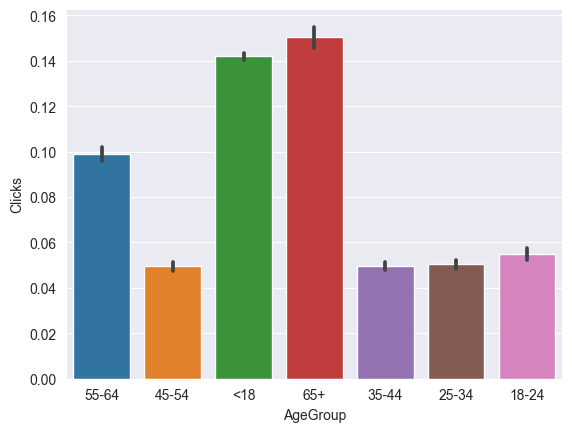

In [45]:

import pandas as pd
import seaborn as sns

%matplotlib inline
sns.barplot(x='AgeGroup',y='Clicks',data=data1)


<AxesSubplot:xlabel='AgeGroup', ylabel='CTR value'>

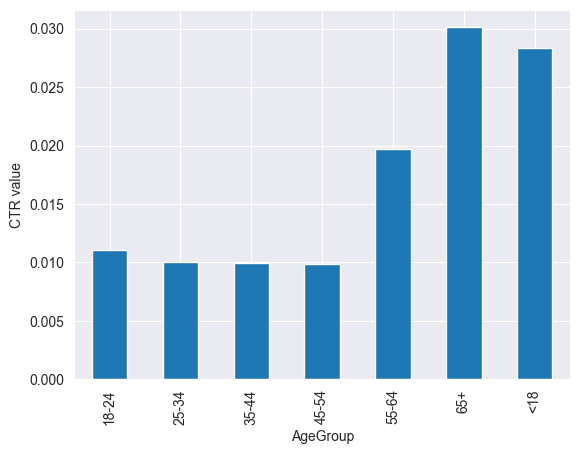

In [46]:

data_sorted = data1[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").mean()
data_sorted["CTR"] = data_sorted.Clicks / data_sorted.Impressions
data_sorted
data_sorted.CTR.plot(kind="bar", ylabel = "CTR value")










<AxesSubplot:xlabel='Gender', ylabel='amount of people'>

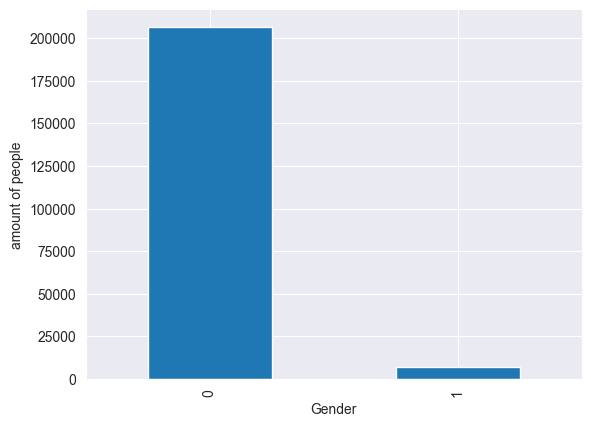

In [47]:
data_genders = data1.loc[data1["AgeGroup"] == "<18"].groupby("Gender").count()
data_genders.AgeGroup.plot(kind="bar", ylabel = "amount of people")

In [48]:
final_data_frame = data_sorted.Impressions.to_frame()
final_data_frame.rename(columns={"Impressions": "Mean Impressions"}, inplace=True)
final_data_frame["CTR"] = data_sorted["CTR"]
final_data_frame["Impressions quantile"] = data1[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.quantile(0.7)
final_data_frame["Median Impressions"] = data1[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.median()
final_data_frame["Max Impressions"] = data1[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.max()
final_data_frame["Dispersion Impressions"] = data1[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.std()
final_data_frame["Dispersion Clicks"] = data1[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Clicks.std()
print(final_data_frame)

          Mean Impressions       CTR  Impressions quantile  \
AgeGroup                                                     
18-24             4.991894  0.011028                   6.0   
25-34             5.004520  0.010073                   6.0   
35-44             4.992755  0.009928                   6.0   
45-54             4.990511  0.009904                   6.0   
55-64             5.013123  0.019736                   6.0   
65+               4.988078  0.030120                   6.0   
<18               5.000482  0.028380                   6.0   

          Median Impressions  Max Impressions  Dispersion Impressions  \
AgeGroup                                                                
18-24                    5.0               16                2.225337   
25-34                    5.0               16                2.234467   
35-44                    5.0               19                2.234941   
45-54                    5.0               17                2.246970   
55-